#**The MNIST Dataset**


MNIST: *Modified National Institute of Standards and Technology*

In [19]:
28*28

784

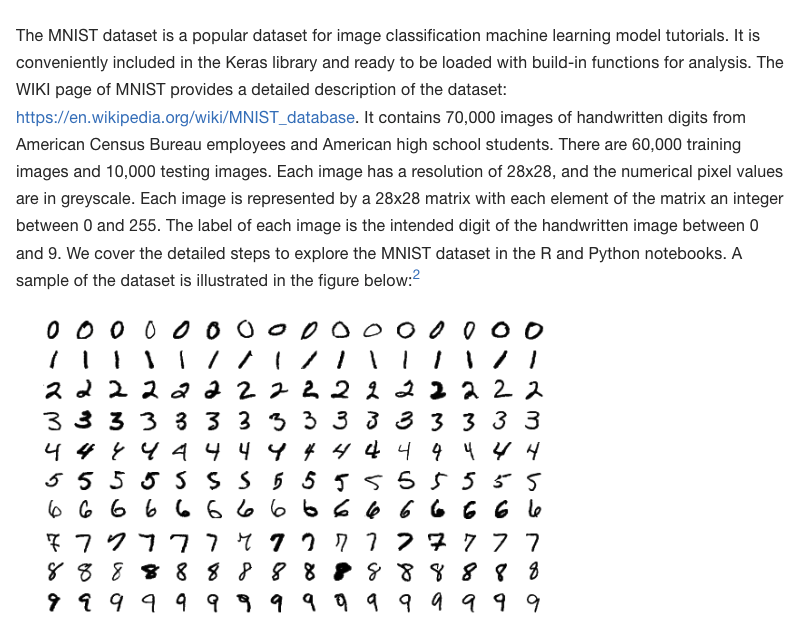

[link to the wiki page](https://en.wikipedia.org/wiki/MNIST_database)

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
import tensorflow
from tensorflow.keras.optimizers import Adam # - Works ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from keras.layers import Dense


In [21]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


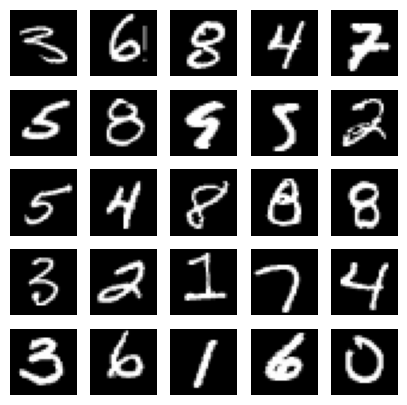

In [24]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
# plt.savefig("mnist-samples.png")
# plt.close('all')

In [25]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [26]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [29]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) #add -1 to match new reshape with original train data.
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [30]:
x_train.shape

(60000, 784)

In [31]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [32]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size,activation = 'relu'))
model.add(Dense(hidden_units,activation = 'relu'))
model.add(Dense(num_labels, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


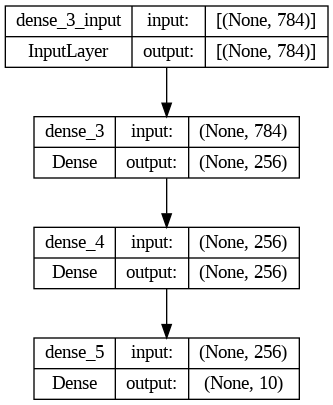

In [34]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 5s 11ms/step - loss: 0.3139 - accuracy: 0.9096 - val_loss: 0.1551 - val_accuracy: 0.9547
Epoch 2/20
329/329 [==============================] - 6s 17ms/step - loss: 0.1136 - accuracy: 0.9655 - val_loss: 0.1111 - val_accuracy: 0.9667
Epoch 3/20
329/329 [==============================] - 4s 14ms/step - loss: 0.0760 - accuracy: 0.9765 - val_loss: 0.1056 - val_accuracy: 0.9693
Epoch 4/20
329/329 [==============================] - 3s 10ms/step - loss: 0.0517 - accuracy: 0.9842 - val_loss: 0.0982 - val_accuracy: 0.9716
Epoch 5/20
329/329 [==============================] - 3s 10ms/step - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.1063 - val_accuracy: 0.9692
Epoch 6/20
329/329 [==============================] - 4s 12ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0966 - val_accuracy: 0.9744
Epoch 7/20
329/329 [==============================] - 4s 11ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.1018 - val_accuracy: 0.9736

In [36]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 2s 3ms/step - loss: 2.3285 - accuracy: 0.1286

Test accuracy: 12.9%


In [37]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 2.3242 - accuracy: 0.1328

Test accuracy: 13.3%


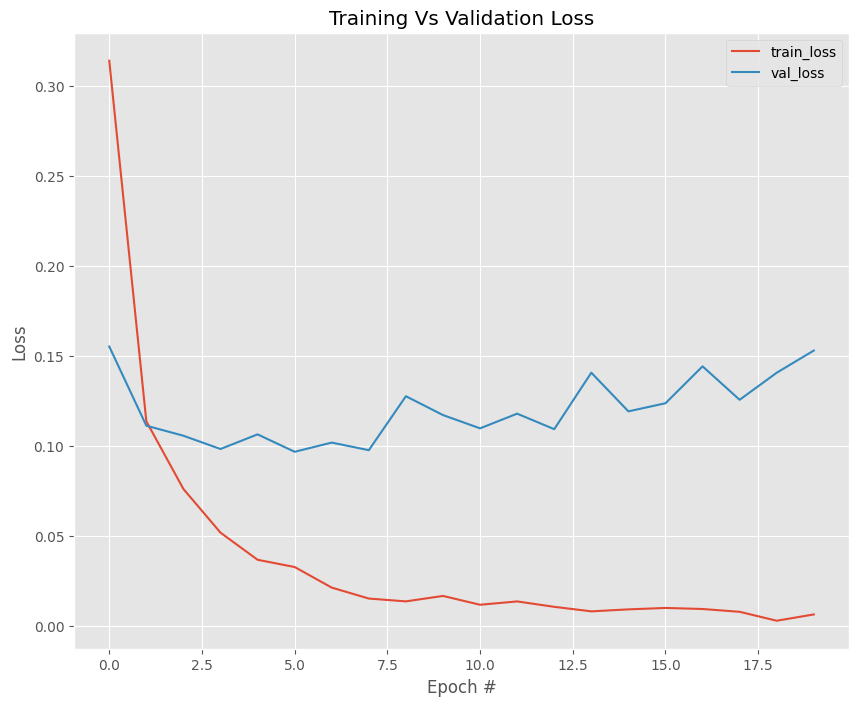

In [38]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding L2 Regualarisation

In [39]:
from keras.layers import Dense , Activation, Dropout
import keras


model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 4s 11ms/step - loss: 0.4965 - accuracy: 0.9118 - val_loss: 0.3112 - val_accuracy: 0.9476
Epoch 2/20
329/329 [==============================] - 3s 10ms/step - loss: 0.2350 - accuracy: 0.9619 - val_loss: 0.2220 - val_accuracy: 0.9612
Epoch 3/20
329/329 [==============================] - 5s 14ms/step - loss: 0.1762 - accuracy: 0.9711 - val_loss: 0.1816 - val_accuracy: 0.9689
Epoch 4/20
329/329 [==============================] - 3s 10ms/step - loss: 0.1500 - accuracy: 0.9757 - val_loss: 0.1716 - val_accuracy: 0.9686
Epoch 5/20
329/329 [==============================] - 5s 16ms/step - loss: 0.1329 - accuracy: 0.9790 - val_loss: 0.1623 - val_accuracy: 0.9704
Epoch 6/20
329/329 [==============================] - 7s 22ms/step - loss: 0.1208 - accuracy: 0.9816 - val_loss: 0.1488 - val_accuracy: 0.9721
Epoch 7/20
329/329 [==============================] - 3s 10ms/step - loss: 0.1114 - accuracy: 0.9831 - val_loss: 0.1623 - val_accuracy: 0.9669

In [40]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1195 - accuracy: 0.9784

Test accuracy: 97.8%


In [41]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0920 - accuracy: 0.9866

Test accuracy: 98.7%


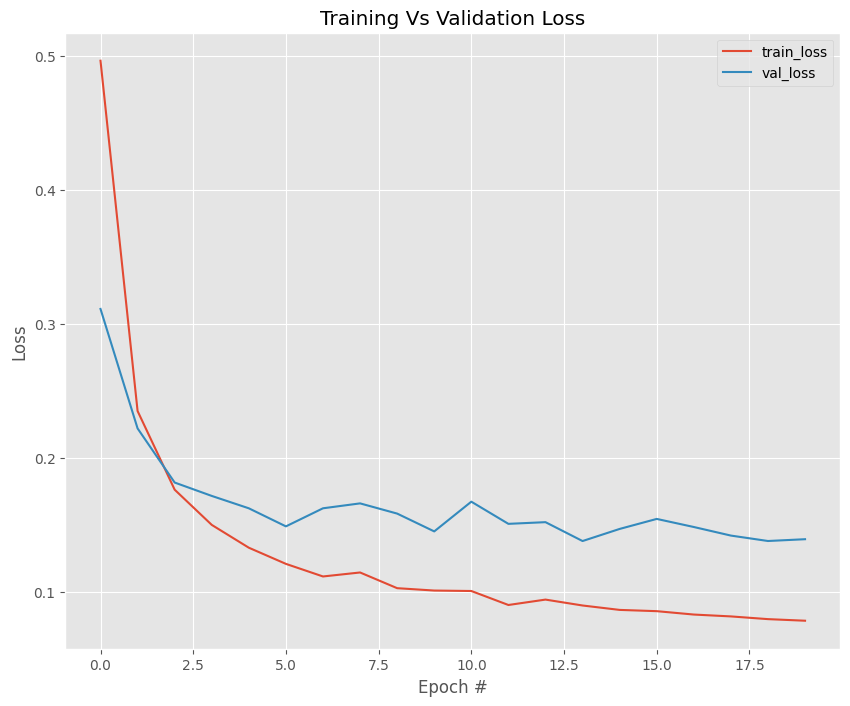

In [42]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding Dropout

In [43]:
from keras.layers import Dense , Activation, Dropout

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 6s 16ms/step - loss: 0.5082 - accuracy: 0.8429 - val_loss: 0.1901 - val_accuracy: 0.9409
Epoch 2/20
329/329 [==============================] - 5s 16ms/step - loss: 0.2270 - accuracy: 0.9324 - val_loss: 0.1456 - val_accuracy: 0.9569
Epoch 3/20
329/329 [==============================] - 4s 12ms/step - loss: 0.1752 - accuracy: 0.9480 - val_loss: 0.1231 - val_accuracy: 0.9643
Epoch 4/20
329/329 [==============================] - 4s 12ms/step - loss: 0.1421 - accuracy: 0.9577 - val_loss: 0.1129 - val_accuracy: 0.9673
Epoch 5/20
329/329 [==============================] - 6s 17ms/step - loss: 0.1263 - accuracy: 0.9613 - val_loss: 0.0982 - val_accuracy: 0.9715
Epoch 6/20
329/329 [==============================] - 4s 12ms/step - loss: 0.1124 - accuracy: 0.9655 - val_loss: 0.0985 - val_accuracy: 0.9713
Epoch 7/20
329/329 [==============================] - 4s 13ms/step - loss: 0.1006 - accuracy: 0.9691 - val_loss: 0.0937 - val_accuracy: 0.9733

In [44]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0728 - accuracy: 0.9804

Test accuracy: 98.0%


In [45]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0336 - accuracy: 0.9914

Test accuracy: 99.1%


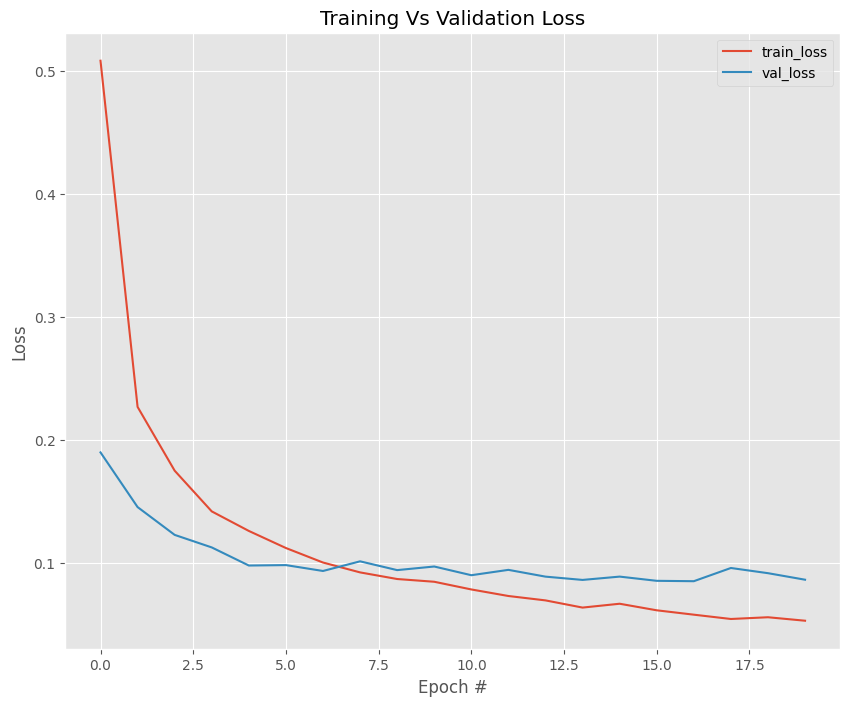

In [46]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding dropout and regularization

In [57]:

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.


Epoch 1/20
329/329 [==============================] - 6s 16ms/step - loss: 0.7062 - accuracy: 0.8437 - val_loss: 0.3465 - val_accuracy: 0.9430
Epoch 2/20
329/329 [==============================] - 4s 12ms/step - loss: 0.3726 - accuracy: 0.9301 - val_loss: 0.2631 - val_accuracy: 0.9579
Epoch 3/20
329/329 [==============================] - 4s 11ms/step - loss: 0.3066 - accuracy: 0.9419 - val_loss: 0.2353 - val_accuracy: 0.9606
Epoch 4/20
329/329 [==============================] - 5s 15ms/step - loss: 0.2688 - accuracy: 0.9489 - val_loss: 0.2159 - val_accuracy: 0.9636
Epoch 5/20
329/329 [==============================] - 4s 12ms/step - loss: 0.2554 - accuracy: 0.9514 - val_loss: 0.2058 - val_accuracy: 0.9653
Epoch 6/20
329/329 [==============================] - 4s 12ms/step - loss: 0.2414 - accuracy: 0.9541 - val_loss: 0.1967 - val_accuracy: 0.9681
Epoch 7/20
329/329 [==============================] - 5s 16ms/step - loss: 0.2316 - accuracy: 0.9574 - val_loss: 0.1998 - val_accuracy: 0.9674

In [58]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1685 - accuracy: 0.9742

Test accuracy: 97.4%


In [59]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1510 - accuracy: 0.9814

Test accuracy: 98.1%


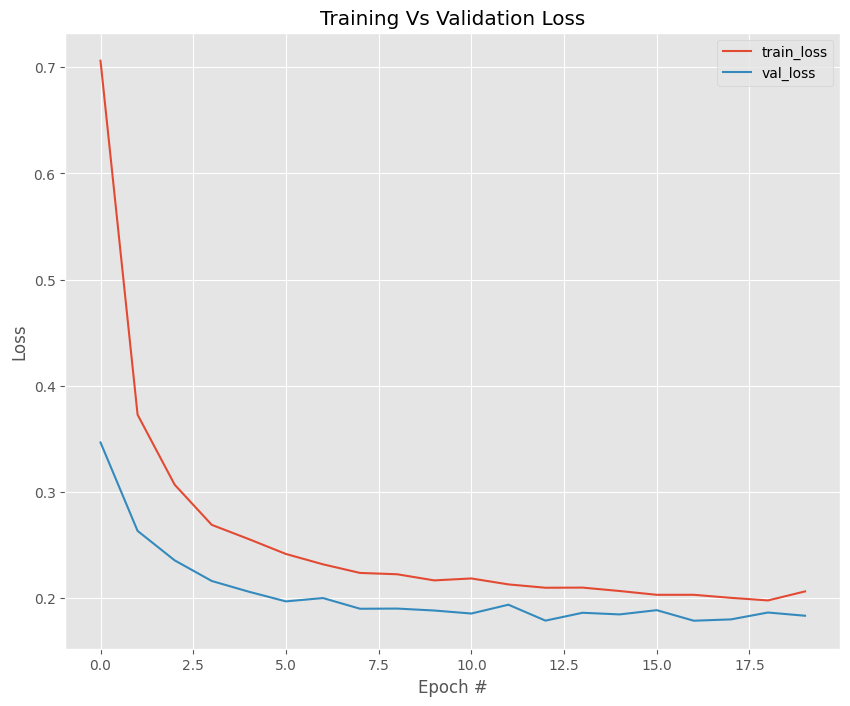

In [61]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig("mnist-samples_L2_Dropout.png")
plt.close('all')